<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [392]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [393]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [394]:
data = pd.read_csv('/content/drive/My Drive/Dataset/M_BAJAS.txt',delimiter='~')
data.Fecha = pd.to_datetime(data.FECHA_BAJA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
data.head(5)

In [395]:
encabezados= ['Año','Mes','Fecha','Antiguedad','Cant_Bajas']
data.columns=encabezados

In [ ]:
data.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [ ]:
data.describe(include='all')

In [ ]:
data.info 

In [396]:
#Agrupamos la columna antiguedad
#1 : 1 TRIMESTRE (0-93 DIAS)
#2 : 2 TRIMESTRE (94-186 DIAS)
#3 : 3 TRIMESTRE (187-279 DIAS)
#4 : 4 TRIMESTRE (280-370 DIAS)
#5 : A 2 AÑOS (371-725 DIAS) 
#6 : A 3 AÑOS (726-1095 DIAS)
#7 : 4 años en adelante (Máximo DIAS 7276) 
bins=[-1,93,186,279,370,725,1095,7276]
names=['1','2','3','4','5','6','7']
data['Antiguedad'] = pd.cut(data['Antiguedad'],bins,labels=names)

In [397]:
#validamos datos sin clasificar
data[pd.isnull(data.Antiguedad)]

,Año,Mes,Fecha,Antiguedad,Cant_Bajas


In [398]:
#pasamos datos a clasificados a entero
data['Antiguedad'] = data['Antiguedad'].astype('int64')

In [ ]:
data.dtypes

In [ ]:
data.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [399]:
grupo = data.groupby(by = ['Año','Mes','Antiguedad']).sum()
grupo= pd.DataFrame(grupo).reset_index()

In [ ]:
grupo.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(grupo).sum())

In [ ]:
#grupo.dropna(subset = ['Cant_Bajas'] , axis=0, inplace=True)

In [401]:
x= grupo.iloc[:,:-1].values
x=np.array(x)
y= grupo.iloc[:,3].values
y = y[:,np.newaxis]

In [402]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder= LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[2])],remainder='passthrough')
x=np.array(ct.fit_transform(x),dtype=np.int)

In [403]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [404]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly_train,y_train)

print("precisión del modelo regresión polinomial")
lineal_poly.score(x_poly_train,y_train)

precisión del modelo regresión polinomial


0.881223363134311

In [425]:
y_predic_train = lineal_poly.predict(x_poly_train)
y_predic_test = lineal_poly.predict(x_poly_test)

In [429]:
cont_reg=0
año=2019
acum1=0
acum2=0
acum3=0
acum4=0
acum5=0
acum6=0
acum7=0
acum8=0
acum9=0
acum10=0
acum11=0
acum12=0
acump1=0
acump2=0
acump3=0
acump4=0
acump5=0
acump6=0
acump7=0
acump8=0
acump9=0
acump10=0
acump11=0
acump12=0
for _ in x_train[:,8]:
  if x_train[cont_reg,7] == año:
    if x_train[cont_reg,8]== 1:
      acum1=acum1+ y_train[cont_reg]
      acump1=acump1+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
    else:
      if x_train[cont_reg,8]== 2:
        acum2=acum2+ y_train[cont_reg]
        acump2=acump2+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
      else:
        if x_train[cont_reg,8]== 3:
          acum3=acum3+ y_train[cont_reg]
          acump3=acump3+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
        else:
          if x_train[cont_reg,8]== 4:
            acum4=acum4+ y_train[cont_reg]
            acump4=acump4+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
          else:
            if x_train[cont_reg,8]== 5:
              acum5=acum5+ y_train[cont_reg]
              acump5=acump5+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
            else:
              if x_train[cont_reg,8]== 6:
                acum6=acum6+ y_train[cont_reg]
                acump6=acump6+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
              else:
                if x_train[cont_reg,8]== 7:
                  acum7=acum7+ y_train[cont_reg]
                  acump7=acump7+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
                else:
                  if x_train[cont_reg,8]== 8:
                    acum8=acum8+ y_train[cont_reg]
                    acump8=acump8+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
                  else:
                    if x_train[cont_reg,8]== 9:
                      acum9=acum9+ y_train[cont_reg]
                      acump9=acump9+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
                    else:
                      if x_train[cont_reg,8]== 10:
                        acum10=acum10+ y_train[cont_reg]
                        acump10=acump10+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
                      else:
                        if x_train[cont_reg,8]== 11:
                          acum11=acum11+ y_train[cont_reg]
                          acump11=acump11+ round(pd.DataFrame(y_predic_train[cont_reg]),0)      
                        else:
                          if x_train[cont_reg,8]== 12:
                            acum12=acum12+ y_train[cont_reg]     
                            acump12=acump12+ round(pd.DataFrame(y_predic_train[cont_reg]),0)       
  else:
      pass
  cont_reg=cont_reg+1
x_g, y_g, y_g_p = [],[],[]
for _ in range(1,13):
  x_g.append(_)
  if _ == 1:
    y_g.append(acum1)
    y_g_p.append(acump1)
  if _== 2:
    y_g.append(acum2)
    y_g_p.append(acump2)
  if _== 3:
    y_g.append(acum3)
    y_g_p.append(acump3)
  if _ == 4:
    y_g.append(acum4)
    y_g_p.append(acump4)
  if _== 5:
    y_g.append(acum5)
    y_g_p.append(acump5)
  if _== 6:
    y_g.append(acum6)
    y_g_p.append(acump6)
  if _ ==7:
    y_g.append(acum7)
    y_g_p.append(acump7)
  if _== 8:
    y_g.append(acum8)
    y_g_p.append(acump8)
  if _== 9:
    y_g.append(acum9)
    y_g_p.append(acump9)
  if _== 10:
    y_g.append(acum10)
    y_g_p.append(acump10)
  if _== 11:
    y_g.append(acum11)
    y_g_p.append(acump11)
  if _== 12:
    y_g.append(acum12) 
    y_g_p.append(acump12)
  

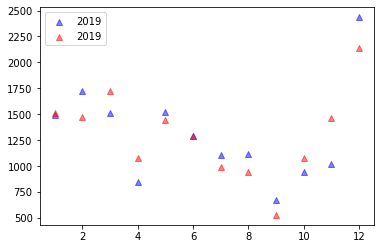

In [431]:
#Gráfica
fig, ax = plt.subplots()
for ciclo in list(range (año,año+1)):   
  if ciclo == año:      
    marca ="^"
  else:
    print ('cero')
    marca ="o"
  ax.scatter(
    x_g[:],    
    y_g[:],
    c="Blue",
    marker = marca,
    label = ciclo,
    alpha=0.5)
  ax.scatter(
    x_g[:],    
    y_g_p[:],
    c="Red",
    marker = marca,
    label = ciclo,
    alpha=0.5)
plt.legend()
plt.show()

In [ ]:
grupo.corr(method ='pearson')

,Año,Mes,Antiguedad,Cant_Bajas
Año,1.000000,-3.729741e-01,0.000000e+00,0.000419
Mes,-0.372974,1.000000e+00,-2.065386e-18,-0.032045
Antiguedad,0.000000,-2.065386e-18,1.000000e+00,0.701732
Cant_Bajas,0.000419,-3.204475e-02,7.017319e-01,1.000000
